---
# Programmieren und Rechnernutzung: Grundlagen und Anwendungen der statistischen Datenanalyse 
**Institut für Experimentelle Teilchenphysik** <br>
Prof. G. Quast <br>
Dr. Th. Chwalek <br>
[Ilias Seite zum Kurs](https://ilias.studium.kit.edu/ilias.php?baseClass=ilrepositorygui&ref_id=2478103) <br>
WS 2024/25 – Blatt 01 <br>
Abgabe:  Mo. 4.11., Di. 5.11. oder Mo. 11.11., Di. 12.11. 

---

Das erste Übungsblatt dient der Wiederholung oder Auffrischung der bereits erlernten *python*-Kenntnisse. Außerdem sollen Sie sich mit Ihrer Arbeitsumgebung auseinandersetzen und gegebenenfalls mit Ihrem Tutor Schwierigkeiten besprechen. Begleitet wird die Wiederholung durch einige aus der Vorlesung bekannte Themen.

Zunächst noch einige ergänzende Worte zu der Umgebung: <br>
Die Umgebung, in der Sie hier arbeiten, wird als *jupyter* notebook bezeichnet. *jupyter notebooks*
sind Dateien vom Typ *.ipynb*, die sowohl erklärenden Text als auch Anweisungen für den Computer
enthalten. *jupyter* bietet eine Browser-Schnittstelle mit einer (einfachen) Entwicklungsumgebung für 
Anweisungen in der Sprache *python* und erklärende Texte im intuitiven *markdown*-Format. Die 
Eingabe von Formeln im $\LaTeX$-Format zur komfortablen und grafisch ansprechenden Gestaltung von 
Formeln wird ebenfalls unterstützt. 

Die *jupyter*-Oberfläche lässt sich zwar komplett mit der Maus bedienen, viel effizienter ist
es allerdings, nach einiger Eingewöhnung die Tastatur zu benuzten. Eine kleine Liste an 
Tastenkürzeln (genannt "*jupyter*-Shortcuts") ist hier - als Tabelle im *markdown*-Format:

 Modus            | Befehl            | Aktion                                      |
:-----------------|:------------------|:--------------------------------------------|
**A**llgemein     | `esc`             | verlässt Editiermodus                       |
  A               | `enter`           | geht in Editiermodus                        |                       
**E**ditiermodus  | `shift` + `enter` | führt Zelle aus und geht zur nächsten       |
  E               | `ctrl` + `enter`  | führt Zelle aus                             |
**K**ommandomodus | `d,d`             | löscht aktuelle Zelle                       |
  K               | `z`               | macht Zellenlöschung rückgängig             |
  K               | `a`               | fügt neue Zelle überhalb der aktuellen ein  |
  K               | `b`               | fügt neue Zelle unterhalb der aktuellen ein |
  K               | `m`               | ändert zu Markdown                          |
  K               | `y`               | ändert zu Code                              |


Durch Doppelklick in diese Zelle sehen Sie den eingegebenen Text, wenn Sie `shift` + `enter`
eingeben, wird die Zelle formatiert und Sie sehen eine schön gesetzte Tabelle. 

Bitte ausprobieren ! 

---
# Aufgabe 1: Fingerübungen und Zufallszahlen <a id="Aufgabe1"></a>
---

Im ersten Aufgabenteil führen Sie einige "Computer-Experimente" durch, um sich selbst einige Zufallszahlen zu erzeugen. Sie überprüfen damit Ihre *python* Kenntnisse und schaffen eine Grundlage für die [zweite Aufgabe](#Aufgabe2). <br>
In den folgenden Aufgabenteilen erzeugen Sie Zufallszahlen für drei gängige Verteilungen und schätzen Sie deren Erwartungswert $\mathrm{E}[n]$ (über den Mittelwert) und Varianz $\mathrm{V}[n]$ (über die Stichprobenvarianz). Probieren Sie sich durch die verschiedenen *numpy* Methoden durch und scheuen Sie sich nicht, ihre Funktionsweisen nachzuschlagen auf entsprechenden Hilfeseiten. (Dieses Prinzip gilt natürlich in voller Allgemeinheit.)

## a) Binomialverteilung
Das klassische Beispiel für die Binomialverteilung ist der mehrfache Wurf einer Münze. Bei jedem einzelnen Wurf wird – idealerweise – mit gleicher Wahrscheinlichkeit das Ergebnis *Kopf* bzw. *Zahl* erwartet. Im Beispiel des Galton-Bretts in der Vorlesung war die Binomialverteilung maßgeblich für die einzelnen Streukörper. Sie werden noch einige weitere interessante Beispiele aus der Modernen Physik kennenlernen, die dieser Verteilung folgen. So werden Sie beispielsweise in der statistischen Mechanik häufig mit Zwei-Zustandssystemen konfrontiert. Beispiele hierfür sind Systeme mit genau zwei Energieniveaus (Energie 1, Energie 2), Fermionzustände (besetzt, nicht besetzt), Spin (up, down) u.v.m.

Die Wahrscheinlichkeit, bei $N$ Würfen mit einer Münze insgesamt $n$ Mal das Ergebnis "Zahl" zu erhalten, wird durch die Binomialverteilung
$$
P(n;p,N)=\left(
\begin{array}{c}
N \\ n
\end{array}
\right)
p^n(1-p)^{N-n},\ \ n=1,\dots,N
$$
beschrieben. Wenn Sie ein solches Experiment oft wiederholen, können Sie die Häufigkeit des Auftretens des Ergebnisses $n$ bestimmen und mit der Binomialverteilung vergleichen.
> Überlegen Sie sich schon im Vorraus wie der Erwartungswert und die Varianz dieser Verteilung aussehen muss.

Nutzen Sie die *numpy*-Methode *np.random.binomial(N, p, size=1)*, um eine Stichprobe mit $N=10$ "fairen Münzwürfen" zu erzeugen.
> Vorüberlegung: Welchen Wert soll in diesem Fall $p$ annehmen?

Wiederholen Sie die Stichprobe 100 Mal und speichern Sie sich in einem Array. Jeder Eintrag in diesem Array kann interpretiert werden als die Häufigkeit des Auftretens des Ergebnisses "Zahl". 
> Hinweis: Verwenden Sie das *size* Argument von *np.random.binomial*, um den Aufwand des Codes zu verringern. 

Berechnen Sie anschließend Erwartungswert und Varianz der gegebenen Binomialverteilung mithilfe der mathematischen Formeln für eine solche Verteilung und vergleichen Sie die Resultate mit den Ergebnissen der Methoden *np.mean(array)* bzw. *np.var(array)*.

In [20]:
import numpy as np
from collections import Counter

In [21]:
S = 100000 # Size of the ensemble of toy experiments (number of toy experiments)
N =100 # how often to toss
p = 0.5 # probability

rng = np.random.default_rng(42)
results_bino = rng.binomial(N, p, size=S)

# print(results_bino)
# calculate mathematical expectation and variance using the mathematical equation for the binomial distribution

math_mean = N * p
math_var = N*p*(1-p)

# calculate sample mean and variance with numpy
sample_mean = np.mean(results_bino)
sample_var = np.var(results_bino)

# print out both sample means and variances

print("Mein Erwartungswert: ", math_mean)
print("Meine Varianz: ", math_var)
print("Numpy Mittelwert: ", sample_mean)
print("Numpy Stichprobenvarianz: ", sample_var)

Mein Erwartungswert:  50.0
Meine Varianz:  25.0
Numpy Mittelwert:  50.01863
Numpy Stichprobenvarianz:  24.951542923100003


Wiederholen Sie den Vorgang (Mehrfachausführung der Zelle) drei bis vier Mal für 100 Experimente (beachten Sie hierfür die Einstellung des Seeds für den Zufallszahlengenerator). <br>
Wiederholen Sie den Vorgang auch für 100000 Experimente.
> Frage: Was fällt dabei auf?

Bei einem Seed von $42$ erscheinen gelegentlich Muster in den Ergebnissen bei den Stichproben.

## b) Gaußverteilung
Die Gauß- oder auch Normalverteilung wird in Ihrem Studium, dem Berufsleben und auch im Alltag sehr häufig auftauchen, da sie für viele Aspekte verwendet wird, in denen stochastische Prozesse eine Rolle spielen. Insbesondere durch den **zentralen Grenzwertsatz** erhält die Normalverteilung eine besondere Stellung in Natur- und Sozialwissenschaften. Dieser sagt nämlich aus, dass für viele additive, unabhängige Zufallseffekte die Verteilung dieser einer Normalverteilung entgegen strebt. <br>
Die Gaußverteilung $f(x;\mu,\sigma)$ wird im Wesentlichen durch zwei Parameter charakterisiert:

* Der Erwartungswert der Verteilung entspricht dem Parameter $\mu$: $\mathrm{E}[x]=\mu$
* Die Standardabweichung der Verteilung ist gegeben durch den Parameter $\sigma$, die Varianz ist dann gegeben durch $\mathrm{V}[x]=\sigma^2$

Die Wahrscheinlichkeitsdichte hat die Form:

$$
f(x;\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}.
$$

Verwenden Sie die *numpy* Methode *np.random.standard_normal(Len)*, um normalverteilte Zufallszahlen mit dem Erwartungswert $\mu=3$ und der Standardabweichung $\sigma=2$ zu erzeugen. *Len* gibt dabei die Länge des erzeugten Arrays an. Verwenden Sie *Len* $=100000$.
> Hinweis: *np.random.standard_normal(Len)* erzeugt Zufallszahlen mit Erwartungswert $\mu=0$ und Standardabweichung $\sigma=1$

Berechnen Sie ebenfalls wieder Mittelwert und Stichprobenvarianz der Zufallszahlen mit den entsprechenden *numpy*-Methoden und vergleichen Sie mit Erwartungswert und Varianz.

In [22]:
Len = 100000 # number of toy experiments
mu = 2  # mean
sig = 3 # standard deviation

rng = np.random.default_rng(42)
results_norm = rng.normal(loc = mu, scale=sig, size=Len)  # MODIFY HERE
    
# calculate mathematical expectation and variance using the mathematical equation for this distribution

math_mean = mu
math_var = np.pow(sig,2)

# calculate sample mean and variance with numpy
sample_mean = np.mean(results_norm)
sample_var = np.var(results_norm)

# print out both means and variances

print("Mein Erwartungswert: ", math_mean)
print("Meine Varianz: ", math_var)
print("Numpy Mittelwert: ", sample_mean)
print("Numpy Stichprobenvarianz: ", sample_var)

Mein Erwartungswert:  2
Meine Varianz:  9
Numpy Mittelwert:  1.9873012091632312
Numpy Stichprobenvarianz:  9.06678287656709


## c) Poissonverteilung
Betrachten Sie als drittes Beispiel die ebenfalls häufig auftretende Poissonverteilung. Die Poissonverteilung wird verwendet bei der Beschreibung von diskreten Ereignissen in festen Intervallen, die unabhängig von der Zeit und mit einer konstanten Rate ablaufen. Sie haben die Verteilung bereits bei radioaktiven Zerfällen kennengelernt. Aber auch im Alltag, wie ankommende Briefe bei der Poststelle oder ankommende Anrufe bei Telefondienstleistern, kommt die Verteilung zum Einsatz. Sie werden im laufenden und in zukünftigen Praktika im Studium ebenfalls häufig auf die Poissonverteilung stoßen. <br>
Die Wahrscheinlichkeitsfunktion der Verteilung als Funktion der Zahl von Ereignissen ($n=0,1,2,\dots$) wird durch
$$
P(n;\nu)=\frac{\nu^n}{n!}e^{-\nu}
$$
beschrieben mit dem reellen Parameter $\nu$, der gleichzeitig Erwartungswert und Varianz der Verteilung darstellt.

Erzeugen Sie 1000 poissonverteilte Zufallszahlen mit der *numpy*-Methode *np.random.poisson(nu,size)* ($\nu=10$) und berechnen Sie erneut Erwartungswert und Varianz von Hand und deren Schätzwerte mithilfe der *numpy*-Methoden.

In [23]:
size = 1000  # number of toy experiments
nu   = 10  # real parameter

rng = np.random.default_rng(42)
results_pois = rng.poisson(nu,size)
    
# calculate mathematical expectation and variance using the mathematical equation for this distribution

math_mean = nu
math_var = nu

# calculate sample mean and variance with numpy
sample_mean = np.mean(results_pois)
sample_var = np.var(results_pois)

# print out both sample means and variances

print("Mein Mittelwert: ", math_mean)
print("Meine Stichprobenvarianz: ", math_var)
print("Numpy Mittelwert: ", sample_mean)
print("Numpy Stichprobenvarianz: ", sample_var)

Mein Mittelwert:  10
Meine Stichprobenvarianz:  10
Numpy Mittelwert:  9.927
Numpy Stichprobenvarianz:  9.983671000000001


---
# Aufgabe 2: Wahrscheinlichkeitsdichten <a id="Aufgabe2"></a>
---
Bisher haben Sie sich allein mit den Parametern und dem Erzeugen von Zufallszahlen beschäftigt. Im Folgenden veranschaulichen Sie sich selbst das Gelernte mithilfe einiger Diagramme. Eines der wichtigsten Werkzeuge an dieser Stelle: das **Histogramm**. Da die Darstellungsmöglichkeiten beinahe unendlich sind, beschränkt sich das Übungsblatt allein auf die Methode *plt.hist()* aus der *matplotlib.pyplot*-Bibliothek. Die folgende Aufgabenstellung führt Sie zu einer nützlichen Darstellung von Daten und fordert Sie in den ersten zwei Aufgabenteilen dazu auf, sich häufig dabei auftretende Fehler im Selbststudium bewusst zu machen.

## a) "Einfach mal plotten"
Häufig ist der erste Gedanke bei der Darstellung von Zufallszahlen und deren Wahrscheinlichkeitsdichtefunktionen (*engl.: probability density functions, kurz: PDFs*) bzw. Wahrscheinlichkeitsfunktionen (*engl.: probability mass functions, kurz: PMFs*), in einem Buch oder in einer Tabelle die PDF bzw. PMF herauszusuchen und einfach zusammen mit den Daten in ein Diagramm zu plotten.

Verwenden Sie die Angaben aus der [vorherigen Aufgabe](#Aufgabe1) für die normalverteilten Zufallszahlen. Stellen Sie die bereits erzeugten Zufallszahlen mit *plt.hist(zahlen)* dar und tragen Sie sie in ein Diagramm mit der PDF ein (*plt.plot(x, y)* wird hier nützlich sein).

In [24]:
import matplotlib.pyplot as plt
import scipy.special as sp

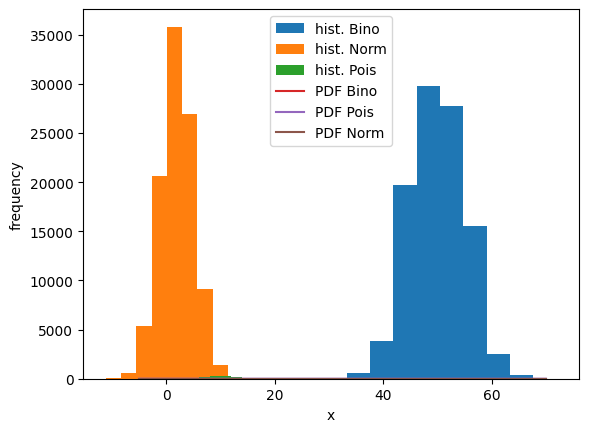

In [25]:
#Binomial distribution
def fBinomial(x, N_B, p_B):
    n = np.around(x)
    return sp.binom(N_B, n) * p_B**n * (1-p_B)**(N_B-n)

# Poisson distribution
def fPoisson(x, nu_P):
    n=np.around(x)
    return (nu_P**n) / np.exp(nu_P) / sp.gamma(n+1.)

# Gaussian distribution
def fGauss(x, mu_N, sigma_N):
    return np.exp(-(x-mu_N)**2/2./sigma_N**2) / np.sqrt(2.*np.pi) / sigma_N

# create array for distribution function
x_gPDF = np.linspace(-5,70,1000)
mean = np.mean(results_norm)
std = np.std(results_norm)

# plot histogram and distribution
plt.hist(results_bino, label='hist. Bino')
plt.hist(results_norm, label='hist. Norm')
plt.hist(results_pois, label='hist. Pois')

plt.plot(x_gPDF,fBinomial(x_gPDF, N, p), label='PDF Bino')
plt.plot(x_gPDF,fPoisson(x_gPDF, nu), label='PDF Pois')
plt.plot(x_gPDF,fGauss(x_gPDF,mean, std), label='PDF Norm')

# adjust plot
plt.xlabel('x')
plt.ylabel('frequency')
plt.legend(loc='best')

plt.show()

Sie sollten sehen, dass das dargestellte Diagramm keinerlei Aussage enthält. Es ist nur das Histogramm ohne die PDF zu sehen. 

## b) Normierung und Binbreite
Wenn Sie sich an die Vorlesung zurückerinnern, dann wird Ihnen ein Detail auffallen: Die Wahrscheinlichkeit(sdichte) ist auf den Wert **1** normiert. Ihre histogrammierten "Daten" sind bisher jedoch noch gar nicht normiert.

Glücklicherweise übernimmt *plt.hist()* genau diese Funktion für Sie. Finden Sie mithilfe der [Dokumentation von *plt.hist()*](https://matplotlib.org/3.6.0/api/_as_gen/matplotlib.pyplot.hist.html) heraus, mit welchem Argument in *plt.hist()* Sie das Histogramm anpassen können, damit das Histogramm normiert ist und mit der PDF in einer Abbildung dargestellt werden kann.

*Ignorieren Sie an dieser Stelle noch die Binbreite.*

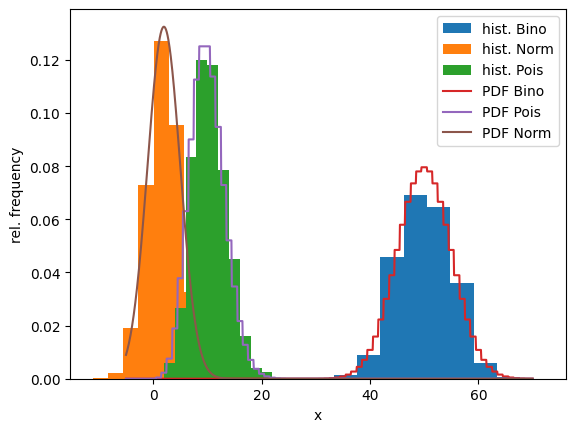

In [26]:
# plot histogram and distribution
plt.hist(results_bino, density=(True), label='hist. Bino')
plt.hist(results_norm, density=(True), label='hist. Norm')
plt.hist(results_pois, density=(True), label='hist. Pois')

plt.plot(x_gPDF,fBinomial(x_gPDF, N, p), label='PDF Bino')
plt.plot(x_gPDF,fPoisson(x_gPDF, nu_P=nu), label='PDF Pois')
plt.plot(x_gPDF,fGauss(x_gPDF,mean, std), label='PDF Norm')

# adjust plot
plt.xlabel('x')
plt.ylabel('rel. frequency')
plt.legend(loc='best')

plt.show()

Sie sollten erkannt haben, dass das Problem mit der Darstellung der PDF gelöst wird.

Die Auswahl der Binbreite ist, anders als die Normierung, alles andere als trivial. Sie hängt meistens von Ihrem Experiment ab und sollte in einfachen Worten die Auflösung Ihrer Messung widerspiegeln. Die Faustregel ist 20-50 Bins für größere Stichproben. Bei kleinen diskreten Verteilungen ist meist die Anzahl der insgesamt auftauchenden unterschiedlichen Zahlen ein gutes Maß für die Binanzahl.

Stellen Sie die Daten zusammen mit der PDF auf zwei Weisen dar:
1. Mit 20 Bins
2. Mit so vielen Bins, dass Sie im Prinzip die PDF nach Riemann "integriert" haben

C:\Users\fadia\AppData\Local\Temp\ipykernel_8084\1912508708.py:4: RuntimeWarning: invalid value encountered in power
  return sp.binom(N_B, n) * p_B**n * (1-p_B)**(N_B-n)


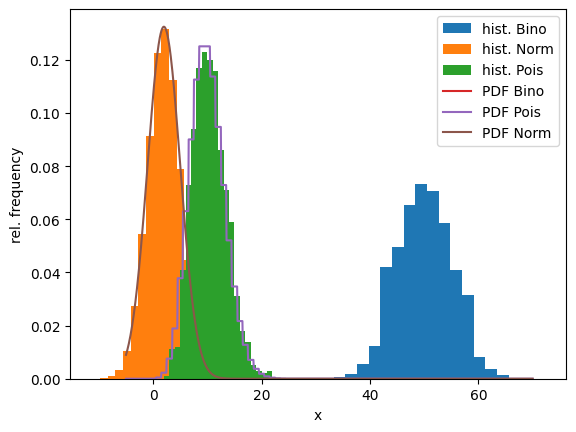

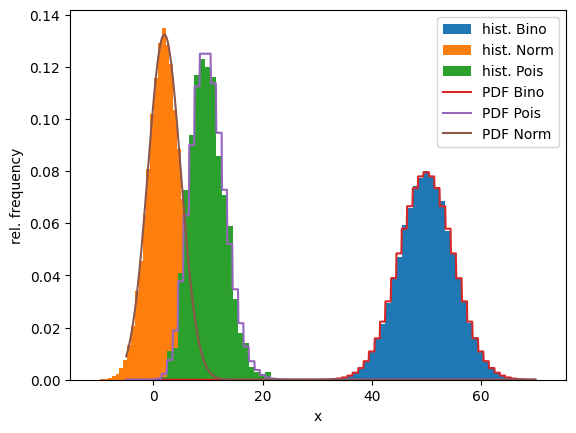

In [35]:
# plot histogram and distribution for 20 bins
plt.hist(results_bino, density=(True), label='hist. Bino', bins= 20)
plt.hist(results_norm, density=(True), label='hist. Norm', bins= 20)
plt.hist(results_pois, density=(True), label='hist. Pois', bins= 20)

plt.plot(x_gPDF,fBinomial(x_gPDF, mean, std), label='PDF Bino')
plt.plot(x_gPDF,fPoisson(x_gPDF, nu_P=nu), label='PDF Pois')
plt.plot(x_gPDF,fGauss(x_gPDF,mean, std), label='PDF Norm')

# adjust plot
plt.xlabel('x')
plt.ylabel('rel. frequency')
plt.legend(loc='best')

plt.show()

# plot histogram and distribution for many bins

plt.hist(results_bino, density=(True), label='hist. Bino', bins= 43, align='left')
plt.hist(results_norm, density=(True), label='hist. Norm', bins= 40)
plt.hist(results_pois, density=(True), label='hist. Pois', bins= 20, align='left')

plt.plot(x_gPDF,fBinomial(x_gPDF, N, p), label='PDF Bino')
plt.plot(x_gPDF,fPoisson(x_gPDF, nu_P=nu), label='PDF Pois')
plt.plot(x_gPDF,fGauss(x_gPDF,mean, std), label='PDF Norm')

# adjust plot
plt.xlabel('x')
plt.ylabel('rel. frequency')
plt.legend(loc='best')

plt.show()

## c) Anwendung des Gelernten
Erstellen Sie für jede Verteilungsfunktion aus [Aufgabe 1](#Aufgabe1) eine representative Abbildung mit den histogrammierten Zufallszahlen und der entsprechenden Wahrscheinlichkeits(dichte)funktion. Achten Sie dabei auf Achsenbeschriftung und Legende.

**Tipps:**
- Wenden Sie die Faustregel bei den gaußverteilten Zufallszahlen an.
- Probieren Sie bei poisson- und binomialverteilten Zufallszahlen aus, welche Binanzahl dem betrachteten Bereich entspricht.
- Verwenden Sie bei poisson- und binomialverteilten Zufallszahlen das Argument *align='left'* in *plt.hist()*.

In [28]:
# Gaussian
# plot histogram and distribution


# adjust plot


# Poisson
# create array for distribution function


# plot histogram and distribution


# adjust plot


# Binomial
# create array for distribution function


# plot histogram and distribution


# adjust plot
